In [1]:
#import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [2]:
f='/project/xprecip/merra2_ncfiles/precip_water/*.nc'
DS_tcwv=xr.open_mfdataset(f,combine='nested',concat_dim='time')
DS_tcwv

<xarray.Dataset>
Dimensions:  (lat: 62, lon: 117, time: 376200)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T00:30:00 ... 2021-09-30T23:30:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5
Data variables:
    TQV      (time, lat, lon) float32 dask.array<chunksize=(24, 62, 117), meta=np.ndarray>
Attributes: (12/32)
    CDI:                               Climate Data Interface version 1.9.8 (...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_slv_Nx.19800101.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    ...                                ...
    RangeBeginningDate:                1980-01-01
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    history_L34RS:                     'Created by L34RS v1.4.2 @ NASA GES DI...
    CDO:                               Climate Data Operators version 1.9.8 (...

In [3]:
tcwv_6hrly_sorted=DS_tcwv['TQV'].sortby('time')
tcwv_6hrly_sum=tcwv_6hrly_sorted.resample(time='6H').sum(dim='time')
print(tcwv_6hrly_sum)

<xarray.DataArray 'TQV' (time: 62700, lat: 62, lon: 117)>
dask.array<stack, shape=(62700, 62, 117), dtype=float32, chunksize=(1, 62, 117), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-11-30T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5


In [4]:
tcwv_6hrly_sum.to_netcdf('/project/xprecip/merra2_ncfiles/precip_water/resampled/tcwv_6hrsum.nc')

In [2]:
f='/project/xprecip/merra2_ncfiles/precip_water/resampled/tcwv_6hrsum.nc'
DS_tcwv=xr.open_dataset(f)
DS_tcwv

<xarray.Dataset>
Dimensions:  (lat: 62, lon: 117, time: 62700)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-11-30T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5
Data variables:
    TQV      (time, lat, lon) float32 ...

In [3]:
precip_water=DS_tcwv['TQV']
precip_water

<xarray.DataArray 'TQV' (time: 62700, lat: 62, lon: 117)>
[454825800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-11-30T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [4]:
monthly_timeseries=[]
for i in range(1980,2023,1):
    print(i)
    year_of_data = precip_water.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_95th=year_of_data.quantile(0.95,dim='time')
    #print(year_of_data)
    monthly_timeseries.append(timeseries_95th)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [5]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'TQV' (month: 515, lat: 62, lon: 117)>
array([[[203.03674393, 199.65372849, 202.21708069, ..., 222.19432373,
         218.65370331, 220.36793365],
        [205.40810318, 203.44330521, 204.35411987, ..., 231.44032364,
         225.94334106, 226.51290665],
        [210.25915604, 209.59120789, 207.1378418 , ..., 227.83158646,
         226.47064896, 227.45833054],
        ...,
        [123.33781891, 104.02370071,  85.9622879 , ...,  72.41427078,
          73.90266418,  76.43673172],
        [118.07998619, 102.03135338,  84.39566269, ...,  65.26182976,
          68.58332138,  68.82352142],
        [112.38848457,  93.28555489,  83.13413925, ...,  63.78311882,
          65.98388824,  68.31576233]],

       [[209.57622147, 205.20186996, 204.35659027, ..., 186.03373718,
         181.96746826, 181.7137146 ],
        [216.98942566, 209.26184845, 204.72645569, ..., 190.02125168,
         189.01976395, 184.74487686],
        [231.60552597, 221.01223755, 213.5313797 , ..., 191.70708084,
         191.17763519, 187.03512573],
...
        [167.77175446, 135.90523911, 111.11071434, ..., 169.33351212,
         165.14255981, 171.56193695],
        [161.90886383, 133.06853333, 113.13296471, ..., 159.35304108,
         162.78984985, 166.99165192],
        [155.59239655, 133.75303192, 118.67616806, ..., 154.85678711,
         162.41639862, 166.21466217]],

       [[181.03890076, 177.4789978 , 174.05680618, ..., 283.41657104,
         283.1239212 , 278.30077057],
        [182.54760666, 180.45316925, 177.63740082, ..., 284.47037964,
         288.05665436, 284.92582855],
        [180.74794235, 181.26386642, 179.0694725 , ..., 281.29889679,
         286.63827057, 289.01326599],
        ...,
        [113.48060493,  93.75894928,  77.20055389, ..., 127.53903275,
         130.8195015 , 131.61104202],
        [102.32418671,  86.07633667,  73.1301651 , ..., 122.92781372,
         128.8477356 , 132.02351685],
        [ 97.02642708,  85.74363747,  76.96878319, ..., 122.89477234,
         125.58813171, 125.63369827]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10 11

In [6]:
dec_ts=monthly_ts.sel(month=12)
dec_ts

<xarray.DataArray 'TQV' (month: 42, lat: 62, lon: 117)>
array([[[194.66382065, 189.56808777, 190.09931259, ..., 255.60274658,
         252.25456467, 256.96071625],
        [194.61659164, 187.0453949 , 187.66326447, ..., 249.23556213,
         249.55252533, 251.18291779],
        [190.08902817, 190.53742599, 182.7525444 , ..., 249.61419067,
         249.42988739, 251.35025864],
        ...,
        [157.08245773, 130.69369125, 107.26989326, ...,  83.20598106,
          87.71216507,  90.60797539],
        [138.94451294, 119.56761398, 104.31396942, ...,  78.3729538 ,
          85.97872658,  90.60533142],
        [128.10262032, 107.86980782,  97.95000305, ...,  82.66904755,
          87.57052345,  93.39080658]],

       [[243.06361771, 237.89441605, 226.17775803, ..., 262.32312622,
         259.20657043, 260.54031372],
        [234.18053513, 231.69697037, 225.56266785, ..., 274.32818298,
         272.04886627, 270.90158081],
        [229.44769135, 223.96961517, 216.86087341, ..., 282.76055145,
         275.58399048, 279.42672577],
...
        [113.38280945,  93.7438839 ,  75.28993645, ..., 115.97632866,
         119.81737175, 127.36801491],
        [109.79492836,  87.05137482,  72.02273636, ..., 109.04395294,
         116.26338425, 124.61180191],
        [105.9186367 ,  87.26648941,  72.90144386, ..., 110.85015717,
         113.58233566, 120.24424286]],

       [[286.42612457, 288.16462097, 286.08620758, ..., 229.69187241,
         232.84777298, 230.97046585],
        [285.93266144, 285.72846832, 283.50112457, ..., 224.74109116,
         222.80617599, 226.53238754],
        [275.87280579, 278.97112732, 276.46238556, ..., 232.69546509,
         229.51745453, 226.12309952],
        ...,
        [ 98.22955399,  79.27783813,  62.10311871, ..., 105.21888123,
         108.46165199, 105.68020668],
        [ 87.34179535,  74.84510231,  60.26843891, ...,  94.31262856,
          95.58040199,  94.15520668],
        [ 75.12109222,  68.59091644,  59.52507954, ...,  86.10969887,
          85.28860512,  82.94428787]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [7]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(dec_ts['lon'])
nlats=len(dec_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_dec=np.zeros((nlats,nlons))
low_ci_dec=np.zeros((nlats,nlons))
high_ci_dec=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_dec[j,i]=slope_thiel
        low_ci_dec[j,i]=low_slope
        high_ci_dec[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

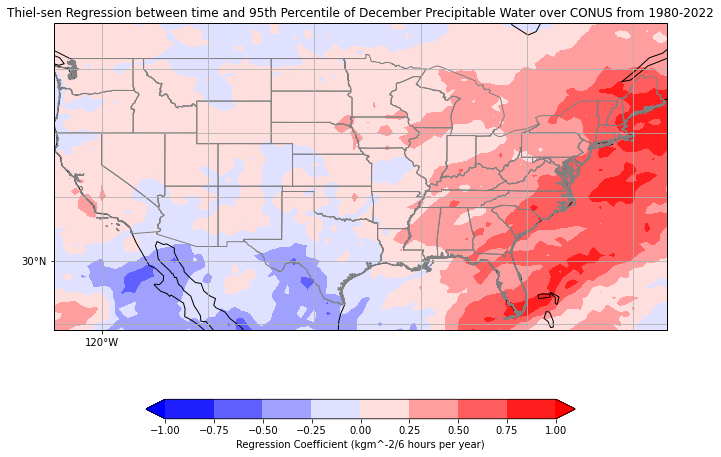

In [8]:
#clevs=np.arange(-1.0,1.0,10)
max_val=1.0
increment=0.25

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_dec
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (kgm^-2/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of December Precipitable Water over CONUS from 1980-2022')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec95th_precipwater_thielsen_total.png')

In [6]:
jan_ts=monthly_ts.sel(month=1)
jan_ts

<xarray.DataArray 'TQV' (month: 43, lat: 62, lon: 117)>
array([[[203.03674393, 199.65372849, 202.21708069, ..., 222.19432373,
         218.65370331, 220.36793365],
        [205.40810318, 203.44330521, 204.35411987, ..., 231.44032364,
         225.94334106, 226.51290665],
        [210.25915604, 209.59120789, 207.1378418 , ..., 227.83158646,
         226.47064896, 227.45833054],
        ...,
        [123.33781891, 104.02370071,  85.9622879 , ...,  72.41427078,
          73.90266418,  76.43673172],
        [118.07998619, 102.03135338,  84.39566269, ...,  65.26182976,
          68.58332138,  68.82352142],
        [112.38848457,  93.28555489,  83.13413925, ...,  63.78311882,
          65.98388824,  68.31576233]],

       [[199.28286896, 202.35130386, 202.05122757, ..., 234.13516922,
         235.20019073, 234.18565369],
        [203.1298317 , 199.70335312, 202.15654907, ..., 238.33882141,
         239.65405273, 233.48867111],
        [205.68127975, 205.51226807, 202.91561432, ..., 243.09710999,
         243.74526749, 237.82266312],
...
        [100.07133865,  82.4074276 ,  67.09881783, ..., 118.78894119,
         120.8517025 , 125.634515  ],
        [ 94.77557106,  78.63365402,  65.70550537, ..., 112.22334328,
         120.46089096, 125.06128159],
        [ 87.68865204,  74.09140358,  66.32178574, ..., 111.89718018,
         117.78360405, 124.59249611]],

       [[249.67308807, 247.45514221, 244.69099884, ..., 221.02403336,
         217.29128571, 212.12828217],
        [242.47302856, 241.85522614, 239.26943817, ..., 221.94696426,
         221.53887711, 222.53047638],
        [233.36448059, 235.07721558, 234.43413239, ..., 223.44744263,
         224.72727127, 230.47368317],
        ...,
        [115.58554497,  95.0279541 ,  79.64221191, ...,  95.04149055,
         102.38778763, 112.69865036],
        [105.61337013,  89.00763817,  76.66506004, ...,  85.6190876 ,
          95.06047897, 105.20833702],
        [ 95.98446922,  83.08671837,  75.43171577, ...,  83.59782372,
          86.25120316,  93.73538284]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [7]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(jan_ts['lon'])
nlats=len(jan_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array=np.zeros((nlats,nlons))
low_ci=np.zeros((nlats,nlons))
high_ci=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array[j,i]=slope_thiel
        low_ci[j,i]=low_slope
        high_ci[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

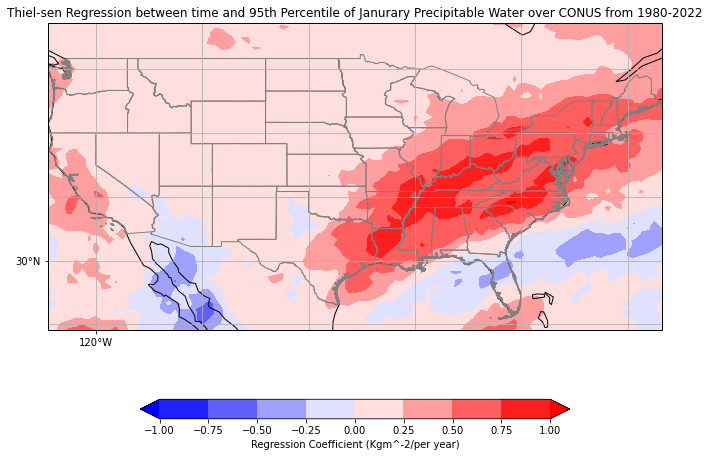

In [8]:

fig = plt.figure(figsize=(11,8.5))
max_val=1.0
increment=0.25

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (Kgm^-2/per year)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of Janurary Precipitable Water over CONUS from 1980-2022')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan95th_precipwater_thielsen_total.png')

In [12]:
feb_ts=monthly_ts.sel(month=2)
feb_ts

<xarray.DataArray 'TQV' (month: 43, lat: 62, lon: 117)>
array([[[209.57622147, 205.20186996, 204.35659027, ..., 186.03373718,
         181.96746826, 181.7137146 ],
        [216.98942566, 209.26184845, 204.72645569, ..., 190.02125168,
         189.01976395, 184.74487686],
        [231.60552597, 221.01223755, 213.5313797 , ..., 191.70708084,
         191.17763519, 187.03512573],
        ...,
        [106.12921143,  85.33683014,  70.09824944, ...,  50.07370853,
          54.38836479,  55.3442564 ],
        [100.96133041,  81.76340866,  66.97745705, ...,  49.61756611,
          53.0653162 ,  55.98403358],
        [ 90.82180595,  77.94114304,  68.33774948, ...,  51.93191433,
          54.54226589,  57.2390604 ]],

       [[217.96688995, 220.14813995, 222.96612244, ..., 245.63733673,
         241.93670044, 241.71693878],
        [209.85751495, 211.39228058, 213.6870079 , ..., 242.20009079,
         239.05712204, 236.53355408],
        [202.96066437, 202.5254837 , 202.12508469, ..., 239.70857315,
         235.66480408, 233.30365753],
...
        [100.34938736,  78.4118351 ,  63.15678158, ...,  77.36951218,
          80.04570389,  83.00608864],
        [ 89.30684662,  72.99488716,  60.36534805, ...,  70.93334427,
          75.98123093,  79.27207108],
        [ 80.2286293 ,  67.61374855,  59.88215561, ...,  72.19567413,
          75.68157997,  77.21386261]],

       [[166.68789978, 171.9813446 , 175.40528564, ..., 224.44625015,
         227.9856926 , 231.46240997],
        [159.71143341, 164.21563416, 168.91075439, ..., 230.36730194,
         227.50615845, 233.37375412],
        [148.61260376, 156.66768341, 160.97344666, ..., 232.5851532 ,
         234.20092621, 237.00109787],
        ...,
        [112.2407074 ,  89.48523865,  72.20976219, ...,  71.58273849,
          73.71885567,  76.49350357],
        [104.20247498,  86.49622498,  71.90538101, ...,  62.01225872,
          67.91542511,  73.84516525],
        [ 99.77748375,  84.00889664,  74.71580353, ...,  61.24631329,
          65.89839516,  69.98439865]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.95
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [13]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(feb_ts['lon'])
nlats=len(feb_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_feb=np.zeros((nlats,nlons))
low_ci_feb=np.zeros((nlats,nlons))
high_ci_feb=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_feb[j,i]=slope_thiel
        low_ci_feb[j,i]=low_slope
        high_ci_feb[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

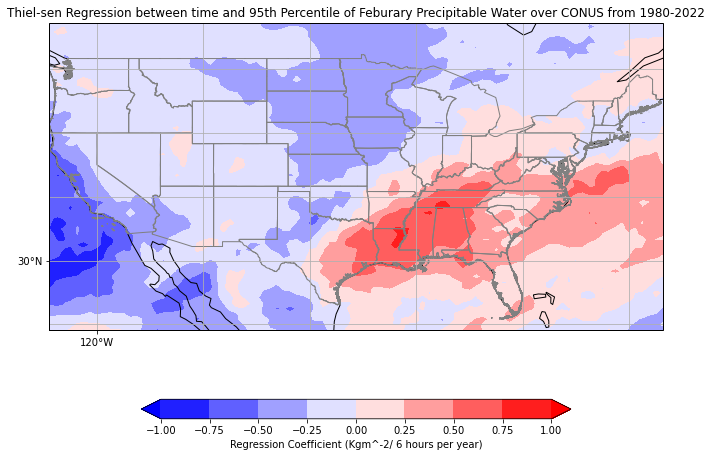

In [14]:
max_val=1.0
increment=0.25

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_feb
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (Kgm^-2/ 6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of Feburary Precipitable Water over CONUS from 1980-2022')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_precipwater_thielsen_total.png')

### Median

In [9]:
monthly_timeseries=[]
for i in range(1980,2023,1):
    print(i)
    year_of_data = precip_water.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_50th=year_of_data.quantile(0.50,dim='time')
    #print(year_of_data)
    monthly_timeseries.append(timeseries_50th)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [10]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'TQV' (month: 515, lat: 62, lon: 117)>
array([[[141.92912292, 140.96098328, 138.43806458, ..., 145.81201935,
         145.05974579, 147.43333435],
        [143.42186737, 142.55599213, 140.84681702, ..., 147.61228943,
         150.42723846, 150.42668152],
        [144.40470886, 144.55732727, 143.41417694, ..., 151.39751434,
         154.22799683, 155.28070831],
        ...,
        [ 42.89024162,  31.98480701,  25.10486603, ...,  30.02777481,
          30.77355003,  31.41712093],
        [ 37.34047127,  30.38980389,  24.2755022 , ...,  27.81386185,
          29.37162399,  31.06437302],
        [ 35.23089981,  29.09490395,  24.22840118, ...,  26.94607258,
          29.88111401,  31.67832851]],

       [[121.57342911, 116.95591736, 113.63247681, ..., 148.7593689 ,
         148.42562866, 148.9418335 ],
        [121.35961533, 118.65133667, 116.03836441, ..., 148.67790222,
         147.21455383, 145.46446228],
        [124.80714417, 118.85909271, 116.38981247, ..., 150.45948029,
         149.07698059, 145.03494263],
...
        [107.01094437,  87.10556412,  72.58213043, ...,  88.73207474,
          84.88473892,  85.87549973],
        [104.28019714,  86.10342789,  71.97602081, ...,  78.56366348,
          80.76398468,  85.93013   ],
        [ 99.90838242,  85.19592667,  74.18695831, ...,  75.52589798,
          76.90766144,  78.33488083]],

       [[134.63920593, 132.91933441, 132.72948456, ..., 223.91915894,
         216.41990662, 217.8117218 ],
        [128.95359039, 129.25390625, 128.06140518, ..., 216.22097778,
         214.26118469, 215.27877808],
        [125.63020325, 126.79959869, 124.84500885, ..., 209.95146942,
         208.2638855 , 205.43283081],
        ...,
        [ 49.75682259,  37.60308456,  28.28575802, ...,  45.09200859,
          45.18585587,  46.4667511 ],
        [ 44.98232841,  34.91734314,  26.86230946, ...,  39.17120743,
          43.38299179,  43.69223022],
        [ 41.10818481,  32.35525513,  26.60427761, ...,  38.14977455,
          39.9096489 ,  42.1861248 ]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10 11

In [17]:
dec_ts=monthly_ts.sel(month=12)
dec_ts

<xarray.DataArray 'TQV' (month: 42, lat: 62, lon: 117)>
array([[[112.90618134, 112.47787094, 112.02990341, ..., 209.52837372,
         207.91857147, 207.96740723],
        [112.53392792, 111.06574631, 108.24648666, ..., 212.61148071,
         208.9859314 , 206.68319702],
        [109.18435669, 108.55140305, 106.67555237, ..., 212.61235809,
         209.98859406, 209.25775909],
        ...,
        [ 68.05159378,  55.01160431,  44.16029739, ...,  32.44791222,
          34.0742569 ,  32.88864708],
        [ 63.87155533,  52.86845207,  42.97259712, ...,  27.72408009,
          29.59708881,  31.20010662],
        [ 60.04708862,  49.95106888,  42.87369156, ...,  27.09608173,
          29.2054081 ,  30.88411903]],

       [[124.67941284, 126.05875397, 126.50153732, ..., 170.79393005,
         170.78308105, 170.82107544],
        [122.31879807, 124.88714218, 123.55792236, ..., 170.02658081,
         168.06639862, 163.6233139 ],
        [120.27690887, 120.56785965, 119.45399857, ..., 169.54090118,
         168.11470795, 163.88592529],
...
        [ 68.09368134,  53.03414726,  42.58564377, ...,  56.21487045,
          58.48043823,  58.63022804],
        [ 63.52615356,  51.296278  ,  41.97761726, ...,  52.34266472,
          56.22352409,  57.25086784],
        [ 59.12413597,  49.74229813,  42.44217491, ...,  53.75676346,
          56.98701286,  57.91149139]],

       [[200.1214447 , 200.01355743, 197.73607635, ..., 165.09400177,
         164.92728424, 163.99273682],
        [192.35597229, 187.2301178 , 189.68987274, ..., 163.16403198,
         164.01490784, 167.05821228],
        [184.38050079, 184.75294495, 178.93364716, ..., 164.47022247,
         161.21521759, 162.81586456],
        ...,
        [ 42.85571098,  31.82163239,  24.01793766, ...,  34.39341736,
          35.863451  ,  36.52419662],
        [ 38.8561573 ,  29.89692879,  23.12627029, ...,  31.03314686,
          34.40540695,  36.13971519],
        [ 34.99163055,  28.00027657,  22.93889999, ...,  31.40203094,
          33.93375587,  36.20430374]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [18]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(dec_ts['lon'])
nlats=len(dec_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_dec=np.zeros((nlats,nlons))
low_ci_dec=np.zeros((nlats,nlons))
high_ci_dec=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_dec[j,i]=slope_thiel
        low_ci_dec[j,i]=low_slope
        high_ci_dec[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

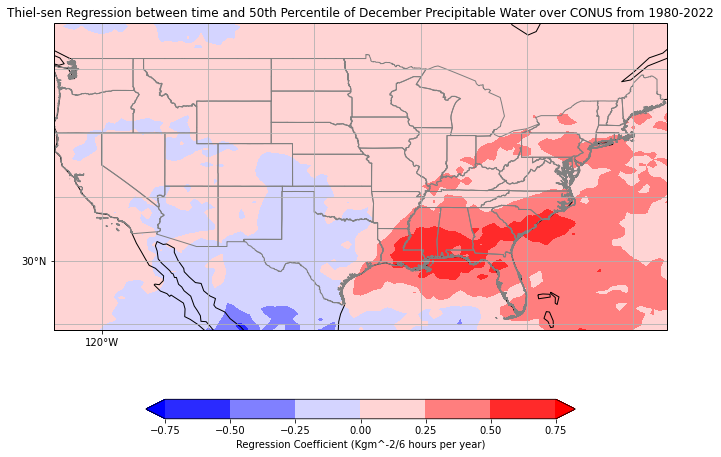

In [19]:
#clevs=np.linspace(-0.1,0.1,20)
max_val=0.75
increment=0.25

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_dec
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (Kgm^-2/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of December Precipitable Water over CONUS from 1980-2022')
plt.savefig('/homes/areed29/CLIM997/summer22_research/decmedian_precipwater_thielsen_total.png')

In [11]:
jan_ts=monthly_ts.sel(month=1)
jan_ts

<xarray.DataArray 'TQV' (month: 43, lat: 62, lon: 117)>
array([[[141.92912292, 140.96098328, 138.43806458, ..., 145.81201935,
         145.05974579, 147.43333435],
        [143.42186737, 142.55599213, 140.84681702, ..., 147.61228943,
         150.42723846, 150.42668152],
        [144.40470886, 144.55732727, 143.41417694, ..., 151.39751434,
         154.22799683, 155.28070831],
        ...,
        [ 42.89024162,  31.98480701,  25.10486603, ...,  30.02777481,
          30.77355003,  31.41712093],
        [ 37.34047127,  30.38980389,  24.2755022 , ...,  27.81386185,
          29.37162399,  31.06437302],
        [ 35.23089981,  29.09490395,  24.22840118, ...,  26.94607258,
          29.88111401,  31.67832851]],

       [[115.95387268, 114.68741226, 112.59015656, ..., 196.0807724 ,
         192.49073029, 187.33655548],
        [113.13336945, 110.71839905, 112.01444244, ..., 199.6760788 ,
         194.44869232, 192.65364838],
        [112.64883423, 111.83633423, 112.11144257, ..., 205.91271973,
         200.72679901, 198.40296173],
...
        [ 58.53961372,  46.1550293 ,  35.2060318 , ...,  42.59794807,
          43.06710052,  42.24382591],
        [ 52.4555397 ,  42.24178505,  34.2467804 , ...,  38.51342392,
          41.6445446 ,  43.17502403],
        [ 48.83268547,  40.12371445,  33.77360535, ...,  40.11304283,
          42.40697861,  43.7620163 ]],

       [[197.55549622, 199.93255615, 195.80711365, ..., 162.9312973 ,
         163.7068634 , 163.5437088 ],
        [192.41345215, 194.15270233, 191.57601929, ..., 165.24519348,
         161.72910309, 158.1075058 ],
        [181.40608215, 183.03269958, 178.28713989, ..., 166.47699738,
         165.05165863, 161.43624115],
        ...,
        [ 63.95476532,  49.65161133,  40.72192574, ...,  28.24603844,
          30.06558132,  31.03910542],
        [ 58.01921463,  47.00407219,  38.42538834, ...,  23.4987812 ,
          26.17418957,  28.43067265],
        [ 55.88463402,  45.13653564,  38.45687103, ...,  21.58479214,
          24.14329529,  26.54938126]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [12]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(jan_ts['lon'])
nlats=len(jan_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array=np.zeros((nlats,nlons))
low_ci=np.zeros((nlats,nlons))
high_ci=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array[j,i]=slope_thiel
        low_ci[j,i]=low_slope
        high_ci[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

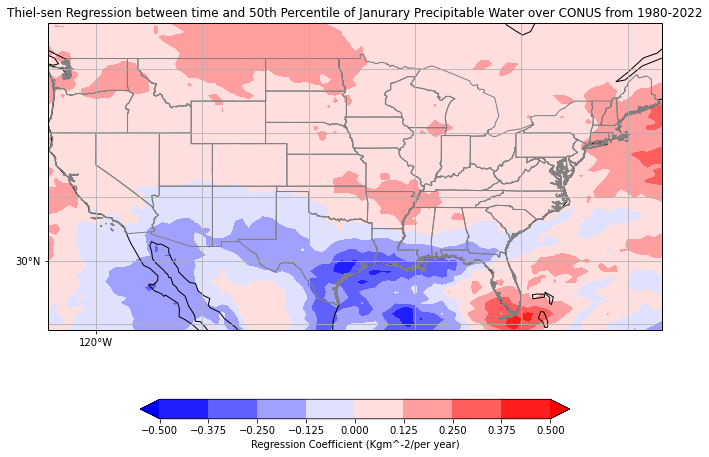

In [13]:
#clevs=np.linspace(-0.125,0.125,20)
max_val=0.50
increment=0.125

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (Kgm^-2/per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of Janurary Precipitable Water over CONUS from 1980-2022')
plt.savefig('/homes/areed29/CLIM997/summer22_research/janmedian_precipwater_thielsen_total.png')


In [23]:
feb_ts=monthly_ts.sel(month=2)
feb_ts

<xarray.DataArray 'TQV' (month: 43, lat: 62, lon: 117)>
array([[[121.57342911, 116.95591736, 113.63247681, ..., 148.7593689 ,
         148.42562866, 148.9418335 ],
        [121.35961533, 118.65133667, 116.03836441, ..., 148.67790222,
         147.21455383, 145.46446228],
        [124.80714417, 118.85909271, 116.38981247, ..., 150.45948029,
         149.07698059, 145.03494263],
        ...,
        [ 65.78845978,  51.50225258,  39.80694008, ...,  24.15139008,
          25.01186848,  26.26763058],
        [ 57.19651031,  47.16379166,  37.1337986 , ...,  22.97615242,
          25.39233589,  26.57120609],
        [ 52.51724815,  43.24391365,  37.55957985, ...,  24.3656702 ,
          26.16812992,  26.96211815]],

       [[110.20485687, 111.90028   , 110.12624359, ..., 164.21318054,
         164.63282776, 167.31106567],
        [105.56739044, 105.37067032, 107.1938858 , ..., 160.98508453,
         163.17608643, 162.84310913],
        [102.91252518, 102.90312576, 102.55843735, ..., 162.36421204,
         161.27058411, 158.40744019],
...
        [ 52.23172379,  40.08607674,  30.223526  , ...,  34.07037163,
          36.70715523,  37.55544662],
        [ 47.518507  ,  37.46086311,  29.33802986, ...,  33.31244659,
          36.31408119,  37.03493881],
        [ 42.97532463,  35.57813072,  29.38449955, ...,  33.9321804 ,
          36.17276955,  36.80016708]],

       [[107.90593719, 105.4291954 , 102.53026581, ..., 176.37245941,
         180.04862976, 181.31710815],
        [100.39693069,  98.26287842,  95.31393814, ..., 177.88345337,
         175.25040436, 174.16434479],
        [ 95.65192032,  93.86576843,  92.47063065, ..., 175.5146637 ,
         173.17446136, 170.49295807],
        ...,
        [ 62.15889549,  51.70861053,  40.77740479, ...,  21.91701221,
          23.73961639,  24.86815739],
        [ 59.92281723,  50.19490051,  41.29968834, ...,  16.8673315 ,
          19.65966988,  21.03870773],
        [ 56.44271469,  48.47498703,  41.56721878, ...,  16.22051334,
          18.37552643,  19.40580082]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [24]:
from scipy.stats import mstats
months=np.arange(0,43,1)
nlons=len(feb_ts['lon'])
nlats=len(feb_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_feb=np.zeros((nlats,nlons))
low_ci_feb=np.zeros((nlats,nlons))
high_ci_feb=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_feb[j,i]=slope_thiel
        low_ci_feb[j,i]=low_slope
        high_ci_feb[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

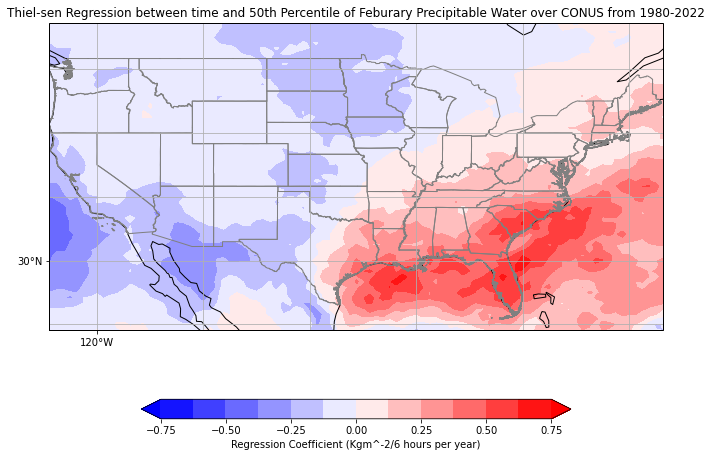

In [25]:
#clevs=np.linspace(-0.125,0.125,20)
max_val=0.75
increment=0.125

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_feb
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (Kgm^-2/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of Feburary Precipitable Water over CONUS from 1980-2022')
plt.savefig('/homes/areed29/CLIM997/summer22_research/febmedian_precipwater_thielsen_total.png')